In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\induj\Downloads\salarydata.csv")

In [3]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [5]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [6]:
# Making sure that the data does not contain unecessary spaces.
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [7]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# Before any analysis, let's convert the target column into numerical classes.
data['salary'] = data['salary'].replace({'<=50K':0,'>50K':1})

In [9]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [11]:
# Checking nan values
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
# checking '?' in our dataset
data.isin(['?']).sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [13]:
# We are replacing '?' with np.nan
data = data.replace(to_replace='?', value=np.nan)

# Now again checking missing values
print("\n ----Missing values---\n")
print(data.isna().sum())

# Missing values in percentage
print("\n ----Missing values in percentage---\n")
print(round((data.isna().sum()/data.shape[0])*100,2))
print("\n---Total {}% of missing values present in our dataset".
      format(round(sum(data.isna().sum()/data.shape[0])*100,2)))


 ----Missing values---

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

 ----Missing values in percentage---

age               0.00
workclass         5.64
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.79
salary            0.00
dtype: float64

---Total 13.09% of missing values present in our dataset


In [14]:
categorical_columns_with_null = ['workclass','occupation','native-country']

In [15]:
for col in categorical_columns_with_null:
    data[col] = data[col].fillna(data[col].mode()[0])

In [16]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [17]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [18]:
categoric_features = data.select_dtypes(include='object')
categoric_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [19]:
data.drop(labels='education-num', axis=1, inplace=True)


In [20]:
data.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


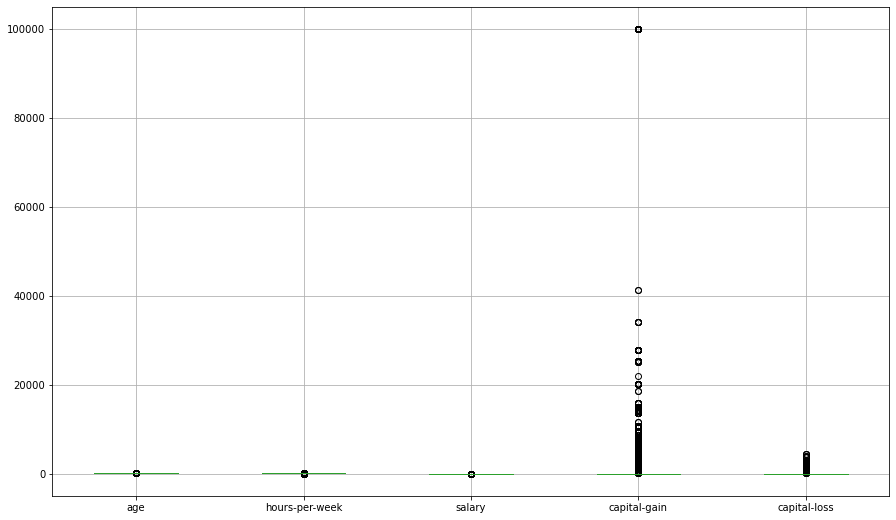

In [21]:
plt.rcParams['figure.figsize']=(15,9)
numeric_features.boxplot(column = ['age',  'hours-per-week', 'salary','capital-gain','capital-loss'])
plt.show()

Text(0.5, 1.0, 'age')

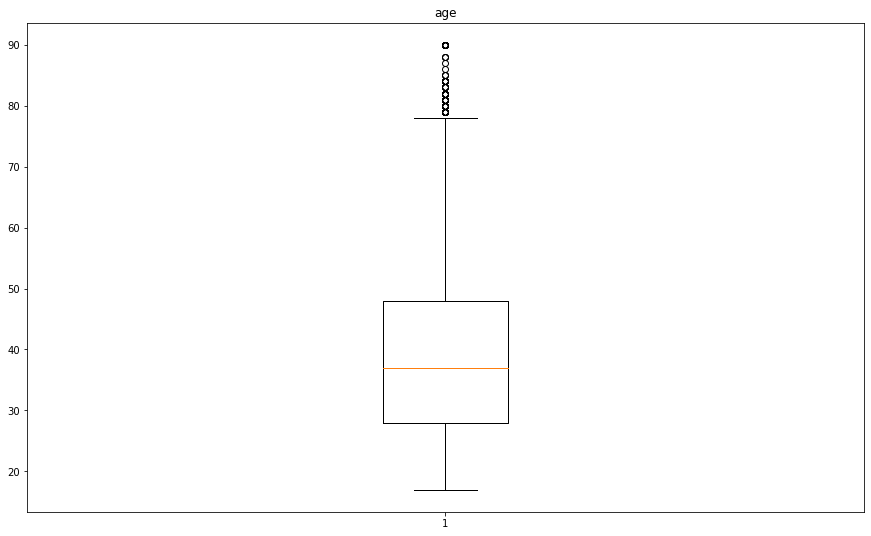

In [22]:
plt.boxplot(data['age'])
plt.title('age')

In [23]:
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

28.0
37.0
48.0


In [24]:
IQR=Q3-Q1
IQR

20.0

In [25]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

-2.0
78.0


In [26]:
# find the outliers
data.loc[(data['age'] > upper_limit) | (data['age'] < lower_limit)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
74,79,Private,Some-college,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,20,United-States,0
222,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,0
430,80,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Male,24,United-States,0
918,81,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,30,United-States,0
1040,90,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,0
32367,90,Local-gov,7th-8th,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,0
32459,85,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,3,Poland,0
32494,82,Private,HS-grad,Never-married,Prof-specialty,Not-in-family,White,Male,3,United-States,0


In [27]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['age']>upper_limit), 'age'] = upper_limit
new_data.loc[(new_data['age']<lower_limit), 'age'] = lower_limit

Text(0.5, 1.0, 'age')

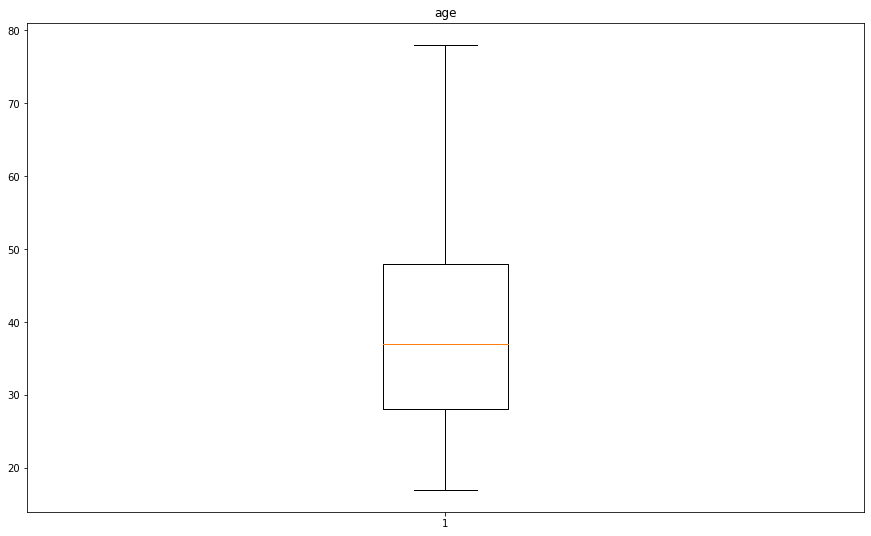

In [28]:
plt.boxplot(new_data['age'])
plt.title('age')

Text(0.5, 1.0, 'hours-per-week')

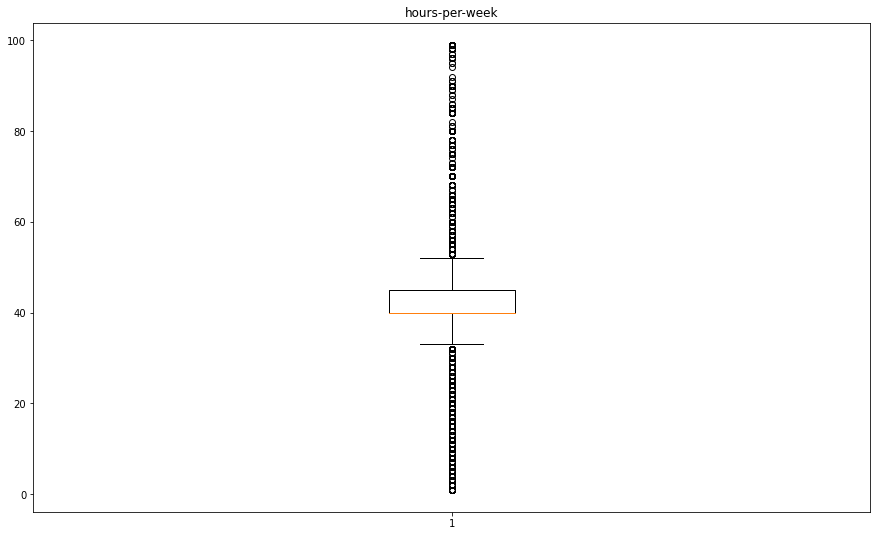

In [29]:
plt.boxplot(data['hours-per-week'])
plt.title('hours-per-week')

In [30]:
Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

40.0
40.0
45.0


In [31]:
IQR=Q3-Q1
IQR

5.0

In [32]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

32.5
52.5


In [33]:
# find the outliers
data.loc[(data['hours-per-week'] > upper_limit) | (data['hours-per-week'] < lower_limit)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
12,23,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,0
20,40,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,30,United-States,0
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,1
32548,65,Self-emp-not-inc,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,60,United-States,0
32553,32,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,0


In [34]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['hours-per-week']>upper_limit), 'hours-per-week'] = upper_limit
new_data.loc[(new_data['hours-per-week']<lower_limit), 'hours-per-week'] = lower_limit

Text(0.5, 1.0, 'hours-per-week')

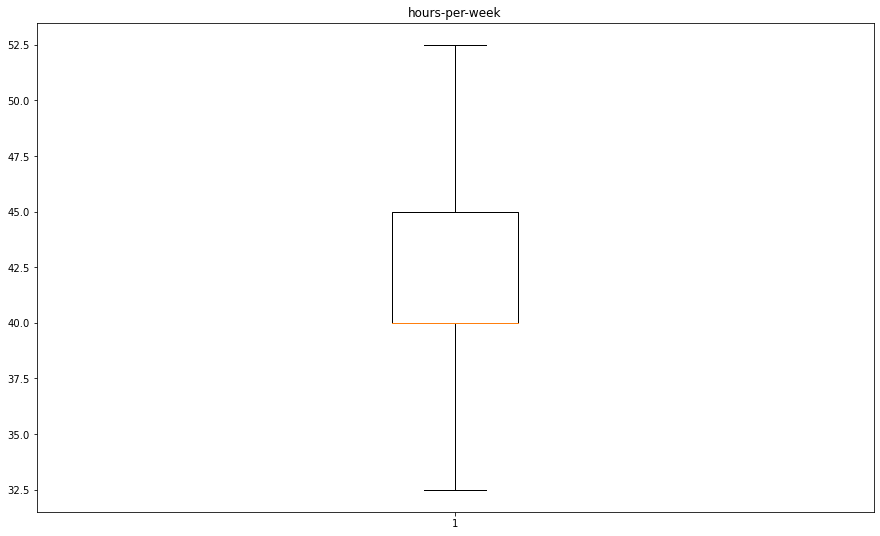

In [35]:
plt.boxplot(new_data['hours-per-week'])
plt.title('hours-per-week')

Text(0.5, 1.0, 'salary')

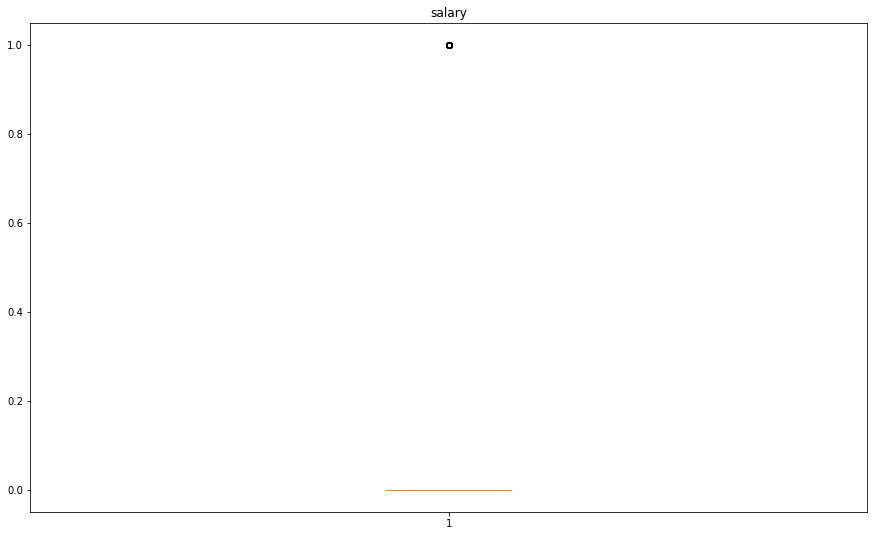

In [36]:
plt.boxplot(data['salary'])
plt.title('salary')

In [37]:
Q1=np.percentile(data['salary'],25,interpolation='midpoint')
Q2=np.percentile(data['salary'],50,interpolation='midpoint')
Q3=np.percentile(data['salary'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [38]:
IQR=Q3-Q1
IQR

0.0

In [39]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

0.0
0.0


In [40]:
# find the outliers
data.loc[(data['salary'] > upper_limit) | (data['salary'] < lower_limit)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1
...,...,...,...,...,...,...,...,...,...,...,...
32539,71,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,10,United-States,1
32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,1
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1


In [41]:
# capping - change the outlier values to upper (or) lower limit values
new_data = data.copy()
new_data.loc[(new_data['salary']>upper_limit), 'salary'] = upper_limit
new_data.loc[(new_data['salary']<lower_limit), 'salary'] = lower_limit

Text(0.5, 1.0, 'salary')

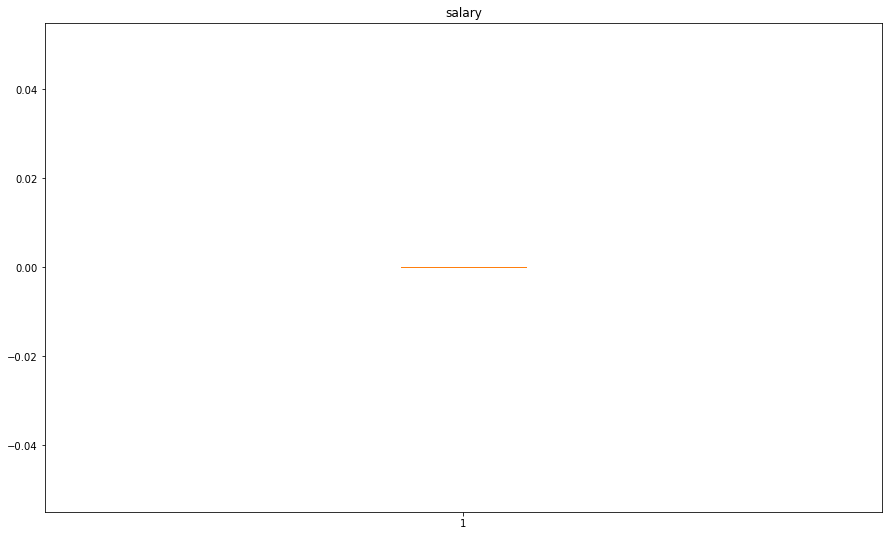

In [42]:
plt.boxplot(new_data['salary'])
plt.title('salary')

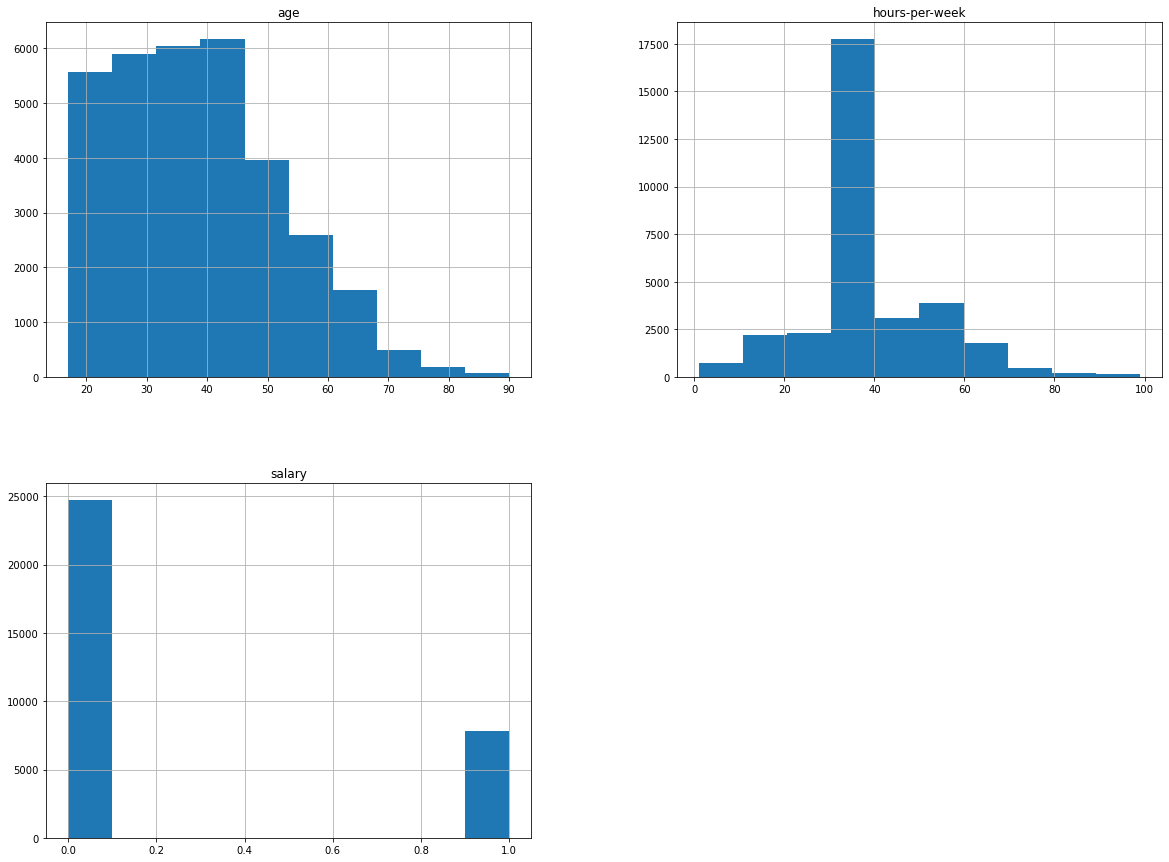

In [43]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

Text(22.907714843749993, 0.5, 'count')

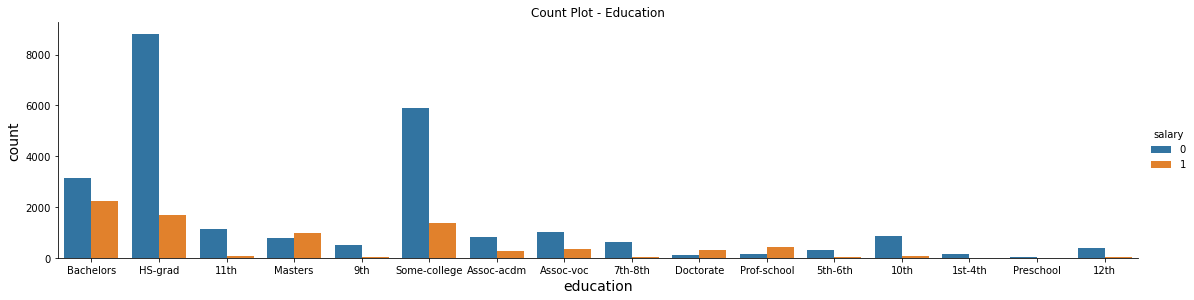

In [44]:
sns.catplot(x='education', data=data, kind='count', hue="salary",  height=4, aspect=4)
plt.title('Count Plot - Education')
plt.xlabel('education', fontsize=14)
plt.ylabel('count', fontsize=14)

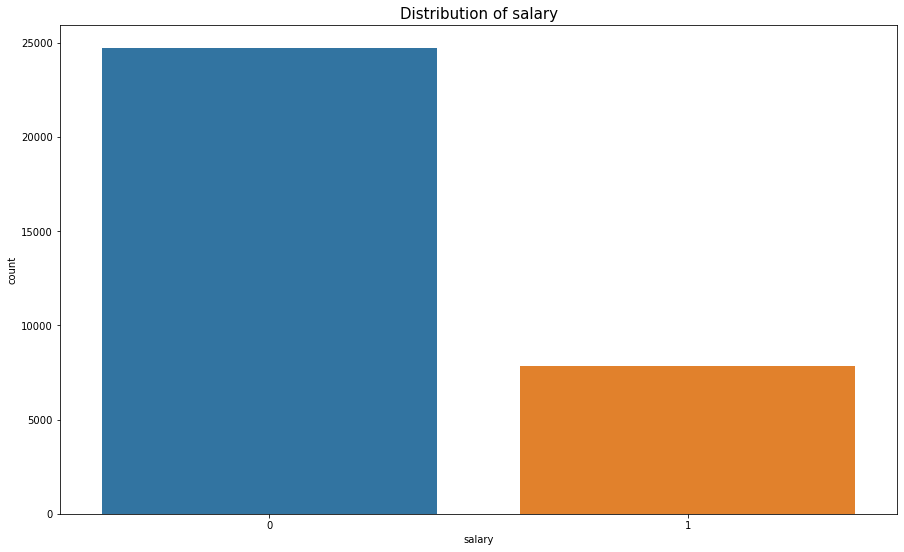

In [45]:
# Checking label counts
sns.countplot(x='salary', data=data)
plt.title("Distribution of salary", fontsize = 15)
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
column = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

for col in column:
    new_data[col] = le.fit_transform(new_data[col])
new_data.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,4,0,1,4,1,40,38,0
1,50,5,9,2,3,0,4,1,13,38,0
2,38,3,11,0,5,1,4,1,40,38,0
3,53,3,1,2,5,0,2,1,40,38,0
4,28,3,9,2,9,5,2,0,40,4,0


In [47]:
X=new_data.drop('salary',axis=1)
y=new_data['salary']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
print( 'The mean squqred error value is:',mean_squared_error(y_test,predictions))
print( 'The r squqred value is:',r2_score(y_test,predictions))      

The mean squqred error value is: 0.0
The r squqred value is: 1.0


In [54]:
data_prep=new_data.copy()

In [55]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'hours-per-week']

scaler = MinMaxScaler()
data_prep[numerical] = scaler.fit_transform(data_prep[numerical])

In [56]:
data_prep.describe()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,0.295639,3.094438,10.298210,2.611836,6.138755,1.446362,3.665858,0.669205,0.402423,36.417155,0.0
std,0.186855,1.107194,3.870264,1.506222,3.972708,1.606771,0.848806,0.470506,0.125994,6.056047,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.150685,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.397959,38.000000,0.0
50%,0.273973,3.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.397959,38.000000,0.0
75%,0.424658,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.448980,38.000000,0.0
max,1.000000,7.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000,40.000000,0.0


In [57]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [59]:
## fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [01:02<00:00,  2.17s/it]

                            Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                       
AdaBoostClassifier              1.00               1.00    None      1.00   
LabelPropagation                1.00               1.00    None      1.00   
XGBClassifier                   1.00               1.00    None      1.00   
RidgeClassifierCV               1.00               1.00    None      1.00   
RidgeClassifier                 1.00               1.00    None      1.00   
RandomForestClassifier          1.00               1.00    None      1.00   
LinearDiscriminantAnalysis      1.00               1.00    None      1.00   
LabelSpreading                  1.00               1.00    None      1.00   
KNeighborsClassifier            1.00               1.00    None      1.00   
BaggingClassifier               1.00               1.00    None      1.00   
GaussianNB                      1.00               1.00    None      1.00   

In [60]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.03
LabelPropagation,1.00,1.00,None,1.00,19.48
XGBClassifier,1.00,1.00,None,1.00,0.22
RidgeClassifierCV,1.00,1.00,None,1.00,0.05
RidgeClassifier,1.00,1.00,None,1.00,0.06
RandomForestClassifier,1.00,1.00,None,1.00,0.35
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.09
LabelSpreading,1.00,1.00,None,1.00,41.21
KNeighborsClassifier,1.00,1.00,None,1.00,0.74
